In [4]:
import json
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np


In [5]:
# Load data from JSON file
with open('job_data.json') as json_file:
    data = json.load(json_file)

Epoch 1/50
3/3 [==============================] - 4s 346ms/step - loss: 8.8524 - accuracy: 0.1111 - val_loss: 8.6115 - val_accuracy: 0.3750
Epoch 2/50
3/3 [==============================] - 0s 51ms/step - loss: 8.5437 - accuracy: 0.1250 - val_loss: 8.3111 - val_accuracy: 0.2500
Epoch 3/50
3/3 [==============================] - 0s 48ms/step - loss: 8.2482 - accuracy: 0.0694 - val_loss: 8.0218 - val_accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 0s 52ms/step - loss: 7.9579 - accuracy: 0.2500 - val_loss: 7.7433 - val_accuracy: 0.2500
Epoch 5/50
3/3 [==============================] - 0s 54ms/step - loss: 7.6863 - accuracy: 0.1944 - val_loss: 7.4767 - val_accuracy: 0.2500
Epoch 6/50
3/3 [==============================] - 0s 47ms/step - loss: 7.4176 - accuracy: 0.2222 - val_loss: 7.2199 - val_accuracy: 0.2500
Epoch 7/50
3/3 [==============================] - 0s 52ms/step - loss: 7.1668 - accuracy: 0.1528 - val_loss: 6.9734 - val_accuracy: 0.2500
Epoch 8/50
3/3 [==========

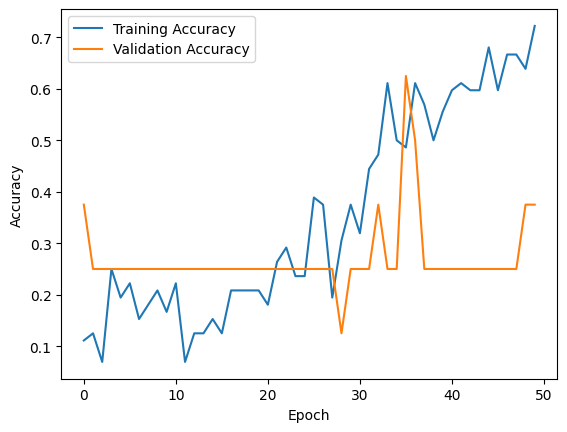

In [11]:
# Extract data from JSON
job_fields = data['job_fields']
X_text = []
y_labels = []

for field in job_fields:
    field_name = field['field_name']
    for job in field['job_examples']:
        skills = ' '.join(job['skills'])  # Only use skills for prediction
        X_text.append(skills)
        y_labels.append(field_name)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_labels)

# Tokenize text data
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_text)
X_encoded = tokenizer.texts_to_sequences(X_text)

# Pad sequences
X_padded = pad_sequences(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.1, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_padded.shape[1]),
    tf.keras.layers.LSTM(64, dropout=0.3),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(set(y_labels)), activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.1))
])

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot the training graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

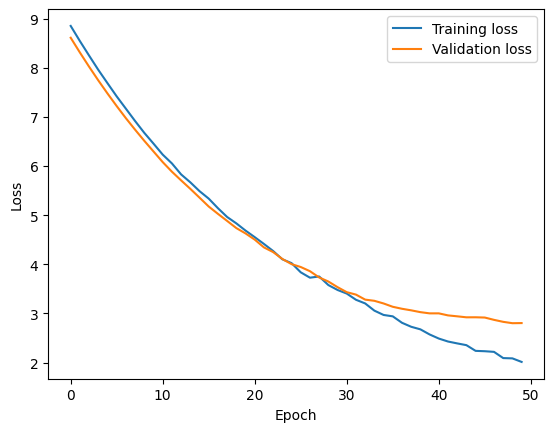

In [12]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 645ms/step
Predicted Class: Science
